<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Deep-Learning-Projects/blob/main/Tesla%20Stock%20Prediction%20-%20LSTM/Tesla_Stock_Analysis_and_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup Enviroment

In [3]:
%%bash
#!/bin/bash
kaggle datasets download simronw/tesla-stock-data-2024
unzip tesla-stock-data-2024.zip

Dataset URL: https://www.kaggle.com/datasets/simronw/tesla-stock-data-2024
License(s): CC0-1.0
tesla-stock-data-2024.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  tesla-stock-data-2024.zip
  inflating: TESLA.csv               


## 1.1 Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import dataset
df = pd.read_csv("/content/TESLA.csv")
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,6/29/10,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,6/30/10,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,7/1/10,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,7/2/10,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,7/6/10,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...,...
3632,3632,12/3/24,351.799988,355.690002,348.200012,351.420013,351.420013,58267200
3633,3633,12/4/24,353.000000,358.100006,348.600006,357.929993,357.929993,50810900
3634,3634,12/5/24,359.869995,375.429993,359.500000,369.489990,369.489990,81403600
3635,3635,12/6/24,377.420013,389.489990,370.799988,389.220001,389.220001,81455800


# 2. Analyze Dataset

In [8]:
df = df.drop(columns=["Unnamed: 0"])

In [9]:
# Missing Values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [11]:
# Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3637.0,8.008057e+01,1.054661e+02,1.076000e+00,1.204667e+01,1.783333e+01,1.760700e+02,4.114700e+02
High,3637.0,8.183271e+01,1.078072e+02,1.108667e+00,1.232000e+01,1.808000e+01,1.797700e+02,4.144967e+02
Low,3637.0,7.821928e+01,1.029312e+02,9.986670e-01,1.174667e+01,1.756400e+01,1.731700e+02,4.056667e+02
Close,3637.0,8.006795e+01,1.054094e+02,1.053333e+00,1.206533e+01,1.784667e+01,1.768800e+02,4.099700e+02
Adj Close,3637.0,8.006795e+01,1.054094e+02,1.053333e+00,1.206533e+01,1.784667e+01,1.768800e+02,4.099700e+02
Volume,3637.0,9.667330e+07,7.787314e+07,1.777500e+06,4.868250e+07,8.198100e+07,1.223940e+08,9.140820e+08


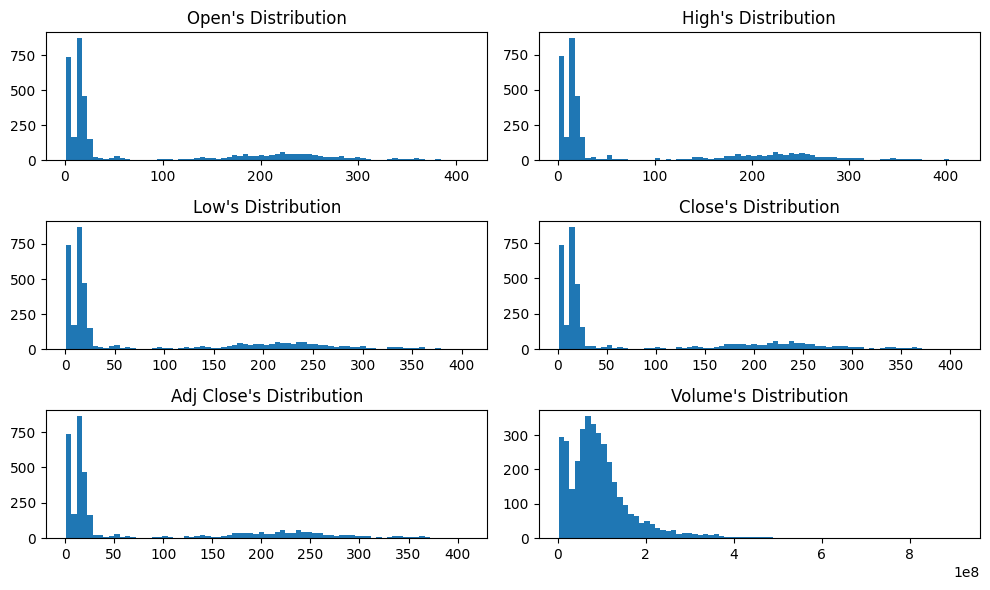

In [21]:
# Check distribution
cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
plt.figure(figsize=(10, 6))
for i, col in enumerate(cols, start=1):
  plt.subplot(3, 2, i)
  plt.hist(df[col], bins=75)
  plt.title(f"{col}'s Distribution")

plt.tight_layout()
plt.show()

In [22]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Set Date col as index
df = df.set_index('Date')

# Check df
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [26]:
# Plot prices over time
def plot_price(col):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index,
             df[col],
             label=f"{col}'s Price",
             color='g')
    plt.title(f"{col}'s Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

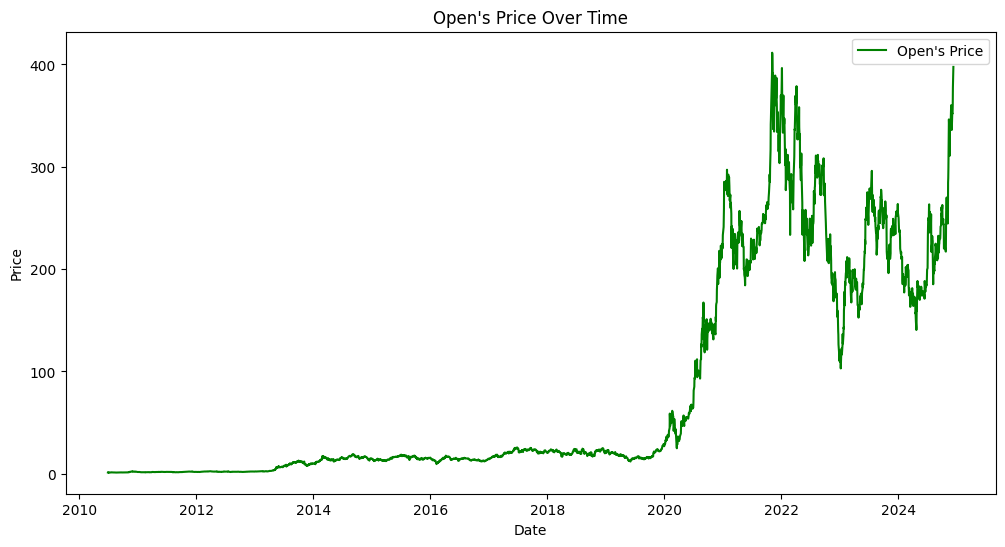

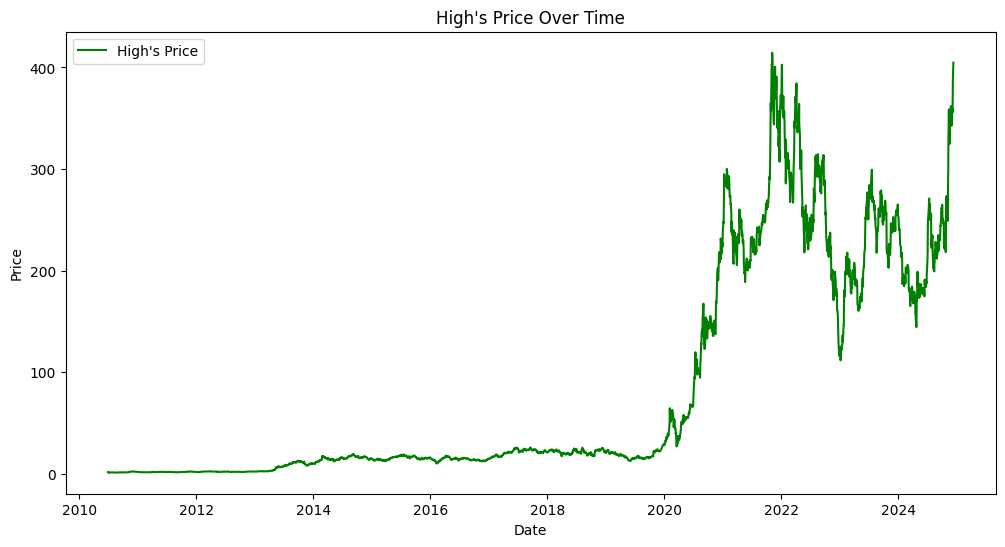

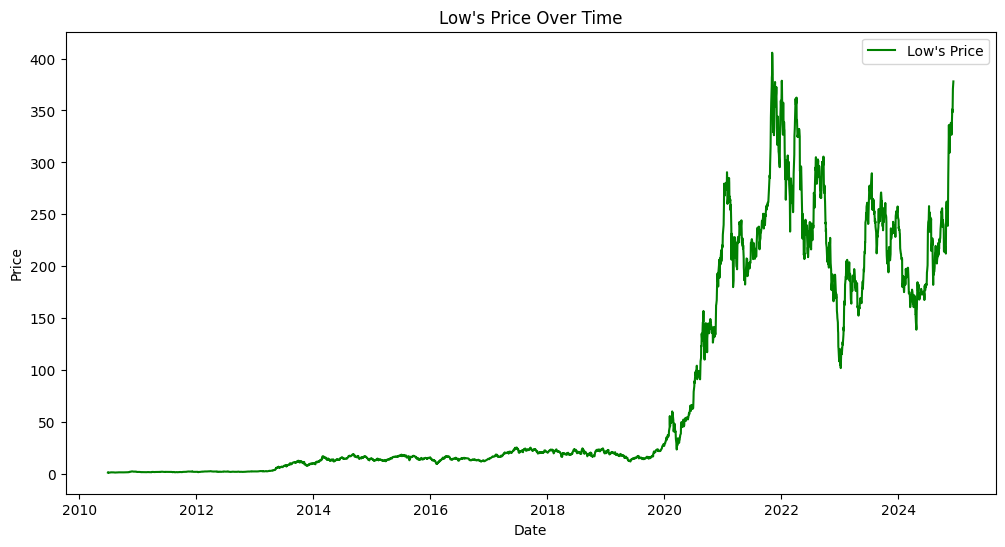

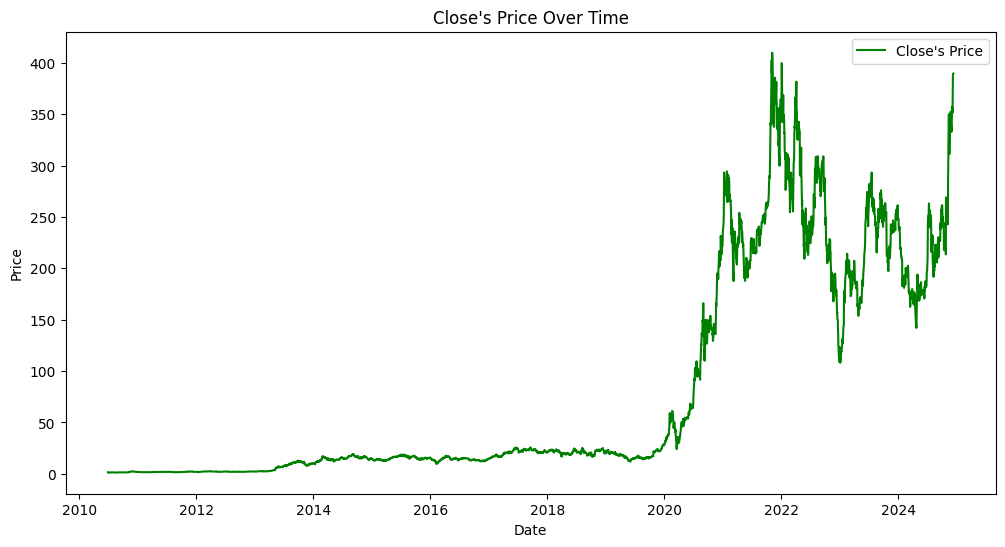

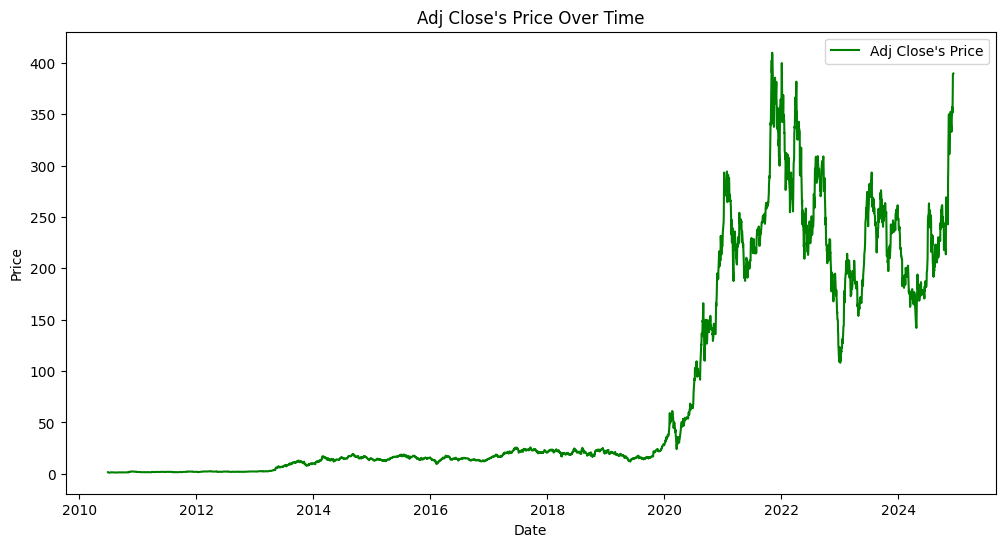

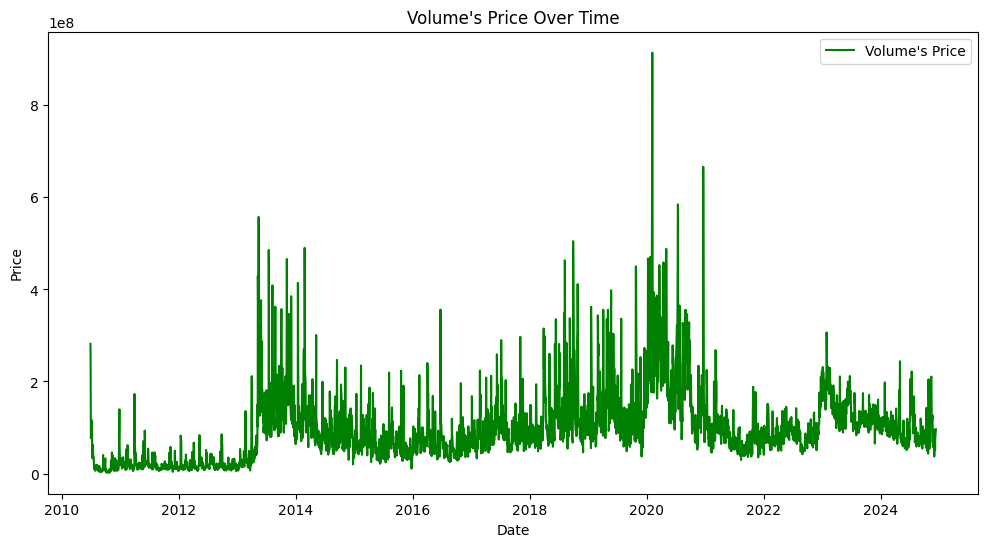

In [27]:
for col in cols:
  plot_price(col)
  print()

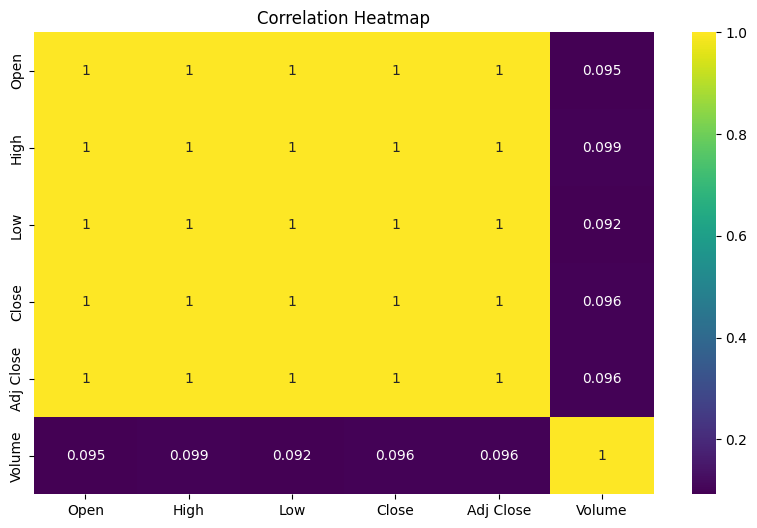

In [30]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

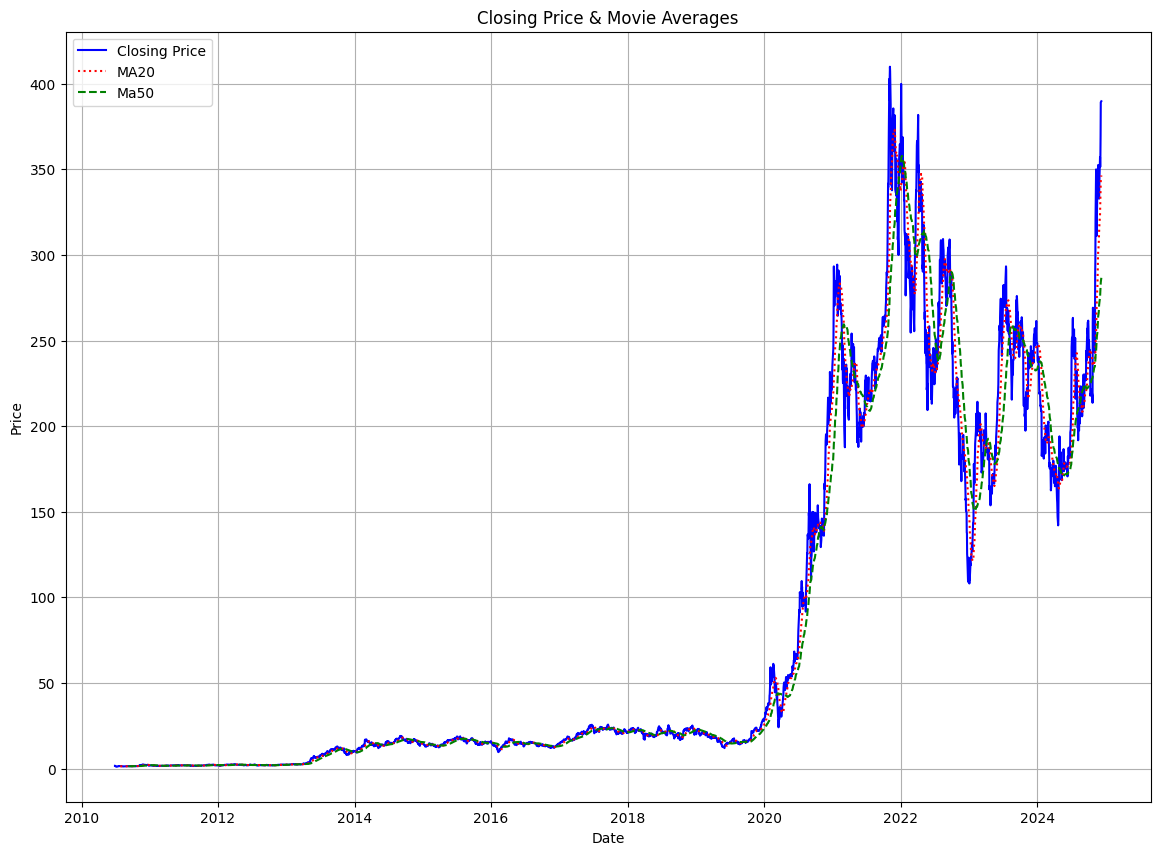

In [35]:
# Create MA feature
# MA20
df['MA20'] = df['Close'].rolling(window=20).mean()
# MA50
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 10))
plt.plot(df.index,
         df['Close'],
         label='Closing Price',
         color='blue')
# MA20 Plot
plt.plot(df.index,
        df['MA20'],
        label='MA20',
        color='red',
         linestyle=":")
# MA50 Plot
plt.plot(df.index,
         df['MA50'],
         label="Ma50",
         color="green",
         linestyle="--")
plt.title("Closing Price & Movie Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# 3. Prepare for Modelling

In [36]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [38]:
# Scaling
# I will use Close feature

prices = df['Close'].values.reshape(-1, 1)
prices

array([[  1.59266698],
       [  1.58866704],
       [  1.46399999],
       ...,
       [369.4899902 ],
       [389.2200012 ],
       [389.7900085 ]])

In [39]:
scaler = MinMaxScaler()
prices = scaler.fit_transform(prices)
prices

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.9010067 ],
       [0.94925616],
       [0.95065011]])

In [44]:
# Create Sequences
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])
        y.append(data[i])

    return np.array(X), np.array(y)

In [45]:
# Split X, y
time_step = 60
X, y = create_sequences(prices, time_step)

# Split Train/Test
split_size = int(0.8 * len(X))
X_train, X_test = X[:split_size], X[split_size:]
y_train, y_test = y[:split_size], y[split_size:]

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (2861, 60, 1)
X_test: (716, 60, 1)
y_train: (2861, 1)
y_test: (716, 1)


# 4. Modelling

In [67]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

In [68]:
# Compile Compile
model.compile(optimizer='adam',
              loss='mean_squared_error')

# Summary of model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# Training the Model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32,
                    verbose=1)

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0054 - val_loss: 0.0032
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 9.0753e-04 - val_loss: 0.0022
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 8.9027e-04 - val_loss: 0.0029
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 7.6901e-04 - val_loss: 0.0033
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 8.4156e-04 - val_loss: 0.0018
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 6.4558e-04 - val_loss: 0.0025
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 8.1288e-04 - val_loss: 0.0026
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 6.5035e-04 - val_loss: 0.0017
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 5.5801e-04 - val_loss: 0.0016
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 6.4322e-04 - val_loss: 0.0018
Epoch 12/50
90/90 ━━━━━━━━

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


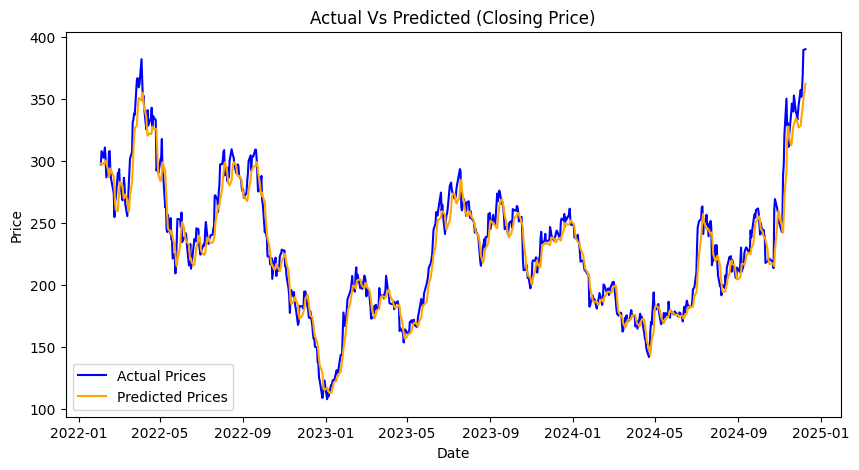

In [70]:
# Evaluate model performance on test data
predicted_prices = model.predict(X_test)
# Inverse transfrom prediction and true values
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test)

# Plot Actual Vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(df.index[-len(y_test):], y_test_actual, label='Actual Prices', color='blue')
plt.plot(df.index[-len(y_test):], predicted_prices, label='Predicted Prices', color='orange')
plt.title("Actual Vs Predicted (Closing Price)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()